# LAB 2 WEEK PRESENTATION
## PLOTTING DATA
### Costanza and Tommaso 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. 

In [11]:
df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")
df = df.iloc[:,1:]
df_num = df.iloc[:,1:].select_dtypes(np.number)
df_cat = df.select_dtypes(object)

In [3]:
df_cat.head(5)

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize


In [4]:
df_num.head(5)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,26794,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,15,31,1,7,707


#### Use seaborn library to construct distribution plots for the numerical variables

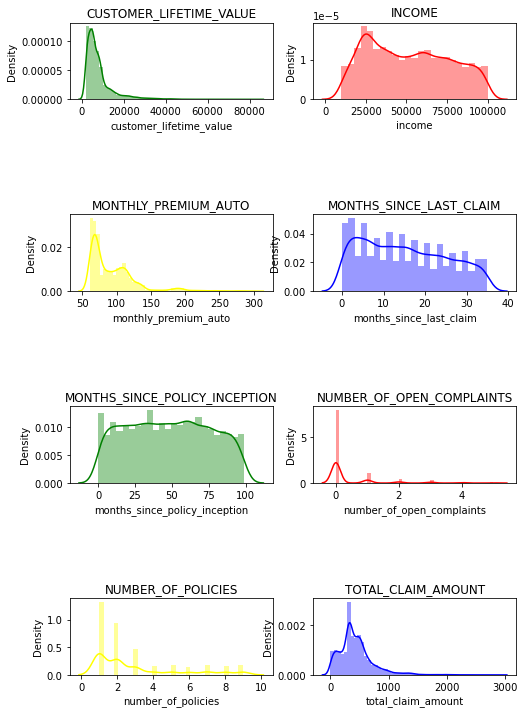

In [5]:
listColor = ['green', 'red', 'yellow', 'blue', 'green', 'red', 'yellow', 'blue']

fig, ax = plt.subplots(4,2, figsize = (8,12))

for i in range(1,9):
    plt.subplot(4,2,i)
    sns.distplot(df_num.iloc[:,i-1], color = listColor[i-1])
    plt.title(f'{df_num.columns[i-1].upper()}')
fig.subplots_adjust(hspace=1.5)

#### Use Matplotlib to construct histograms

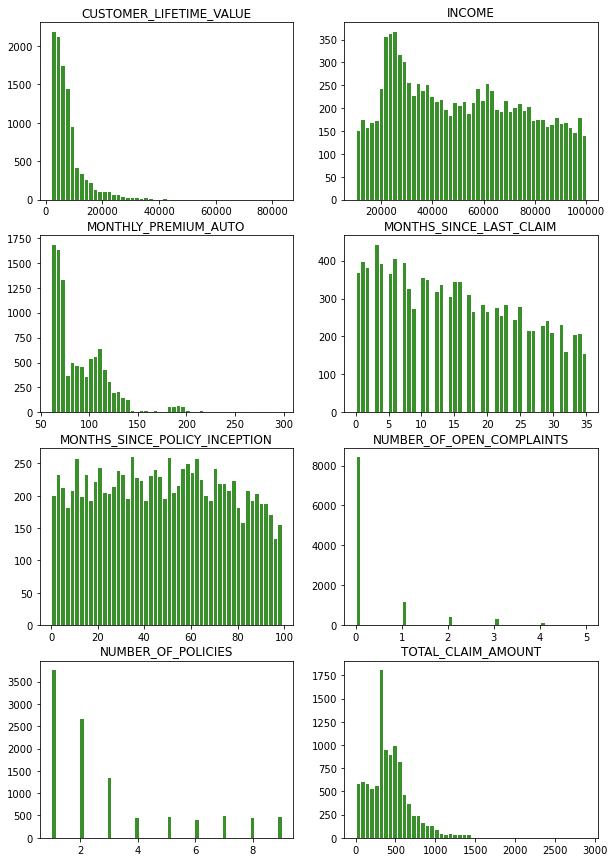

In [6]:
fig, ax = plt.subplots(4,2, figsize = (10,15))
for i in range(1,9):
    plt.subplot(4,2,i)
    plt.hist(df_num.iloc[:,i-1], color = '#398f29', edgecolor = 'white', bins = 50)
    plt.title(f'{df_num.columns[i-1].upper()}')

#### Do the distributions for different numerical variables look like a normal distribution?
#### Pontetially normally distributed: Total Claim amount (kind of)

#### For the numerical variables, check the *multicollinearity* between the features. Please note that we will use the column total_claim_amount later as the target variable.

In [7]:
df_num.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,-0.000276,0.404235,0.012466,0.017055,-0.028099,0.016789,0.232849
income,-0.000276,1.000000,-0.010804,-0.018013,0.011509,0.013057,-0.001515,-0.118201
monthly_premium_auto,0.404235,-0.010804,1.000000,0.006959,0.019696,-0.002423,-0.018805,0.630149
months_since_last_claim,0.012466,-0.018013,0.006959,1.000000,-0.036883,-0.002617,0.006791,0.008979
months_since_policy_inception,0.017055,0.011509,0.019696,-0.036883,1.000000,0.004368,-0.009719,0.004186
number_of_open_complaints,-0.028099,0.013057,-0.002423,-0.002617,0.004368,1.000000,0.002748,-0.007332
number_of_policies,0.016789,-0.001515,-0.018805,0.006791,-0.009719,0.002748,1.000000,-0.008019
total_claim_amount,0.232849,-0.118201,0.630149,0.008979,0.004186,-0.007332,-0.008019,1.000000


<AxesSubplot:>

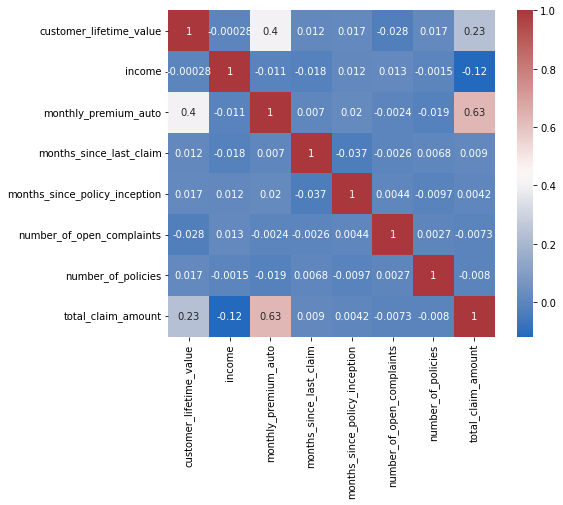

In [8]:
fig = plt.figure(figsize=(8,6))
sns.heatmap(df_num.corr(), cmap='vlag', square=True, annot=True)

#### Check correlation among all numerical variables

In [9]:
#sns.pairplot(df_num, palette=None, kind='scatter',diag_kind='auto',
#             height=2.5, aspect=1, size=None)

#### Check correlation between Total claim amount and Monthly premium auto

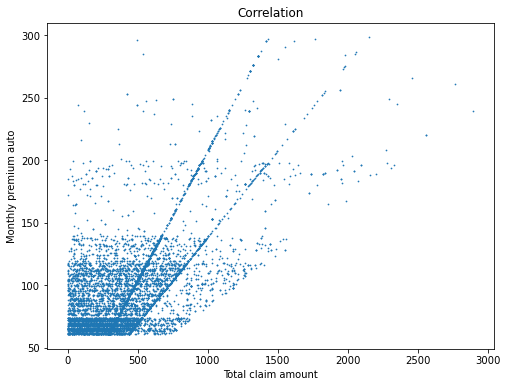

In [414]:
fig = plt.figure(figsize=(8,6))
plt.scatter(df_num['total_claim_amount'], df_num['monthly_premium_auto'], s=.5)
plt.title("Correlation")
plt.xlabel("Total claim amount")  
plt.ylabel("Monthly premium auto")

df3 = df[['total_claim_amount', 'monthly_premium_auto']]

# Check correlation between Customer lifetime value and Monthly premium auto

Text(0, 0.5, 'Monthly premium auto')

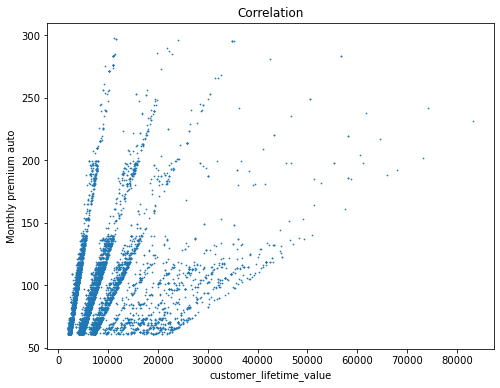

In [415]:
fig = plt.figure(figsize=(8,6))
plt.scatter(df_num['customer_lifetime_value'], df_num['monthly_premium_auto'], s=.5)
plt.title("Correlation")
plt.xlabel("customer_lifetime_value")
plt.ylabel("Monthly premium auto")


Text(18.58125000000001, 0.5, 'Monthly premium auto')

<Figure size 576x432 with 0 Axes>

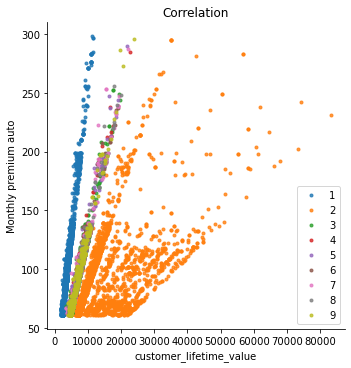

In [416]:
## It shows 9 lines, so I checked by number of policies
fig = plt.figure(figsize=(8,6))
sns.lmplot( x="customer_lifetime_value", y="monthly_premium_auto", data=df, fit_reg=False, 
           hue='number_of_policies', markers='.', legend=False)
plt.legend(loc='lower right')
plt.title("Correlation")
plt.xlabel("customer_lifetime_value")
plt.ylabel("Monthly premium auto")

In [417]:
### plot them with bar charts
x1 = df.groupby(df['number_of_policies']).mean(['customer_lifetime_value'])
#sns.barplot(x=x1.index, y='number_of_policies', data=x1)
x1.reset_index(inplace=True)
x1['number_of_policies'].astype(str)
x1

,number_of_policies,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,total_claim_amount
0,1,3603.290775,51747.786942,94.147502,15.030663,48.172879,0.386730,438.665874
1,2,15758.456101,51472.386533,93.719494,15.092634,48.141741,0.375000,437.764137
2,3,7001.406780,52655.885777,91.326455,15.403832,49.013265,0.397937,418.803979
3,4,7008.675052,49656.002096,92.255765,14.645702,47.266247,0.379455,433.163522
4,5,7015.883436,52036.574642,92.490798,15.341513,47.543967,0.423313,426.995910
5,6,6921.960280,55018.619159,90.296729,15.144860,49.079439,0.394860,415.345794
6,7,7104.281853,51734.094595,93.314672,16.243243,45.984556,0.424710,456.291506
7,8,7157.269737,50913.087719,93.239035,15.052632,49.377193,0.410088,440.642544
8,9,7034.778905,50644.016227,92.022312,14.716024,46.361055,0.338742,418.813387


<BarContainer object of 9 artists>

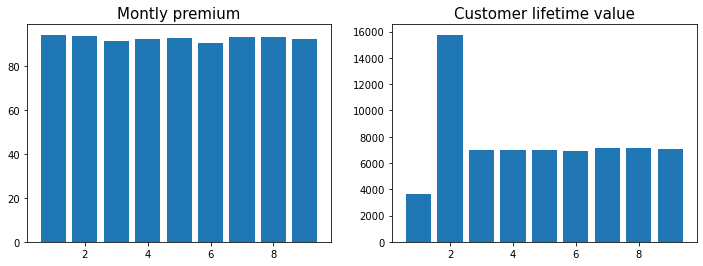

In [418]:
fig, ax = plt.subplots(1,2,figsize = (12,4))

ax[0].set_title('Montly premium', fontsize=15)
ax[0].bar(x1['number_of_policies'], x1['monthly_premium_auto'])

ax[1].set_title('Customer lifetime value', fontsize=15)
ax[1].bar(x1['number_of_policies'], x1['customer_lifetime_value'])

#### Optional: Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.
#### ANSWER: no correlation higher than .9


#### Show a plot of: the total number of responses

<BarContainer object of 2 artists>

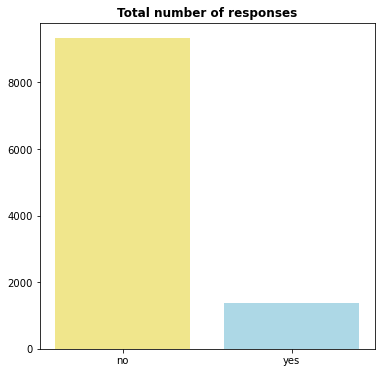

In [419]:
fig, ax = plt.subplots(figsize = (6,6))
responses = df_cat['response'].value_counts()
ax.set_title('Total number of responses', fontweight='bold')
ax.bar(responses.index, responses, color=('khaki','lightblue'))

#### Show a plot of the response by: 
1) the sales channel

2) total claim amount

3) income


In [420]:
## We created categories of continuous variables by splitting them in quartiles 
# This is a function to create a new columns representing the quartile range of the previous one
def createQuartiles(col):
    quartiles = col.describe()
    col = ['Q1' if x<quartiles['25%'] else 'Q2' if (x>=quartiles['25%'] and x<quartiles['50%']) 
           else 'Q3' if (x>=quartiles['50%'] and x<=quartiles['75%']) else 'Q4' for x in col]
    return col


In [421]:
## apply the fuction to income and claim amount to divide them in quartiles groups
df['claimQuart'] = createQuartiles(df['total_claim_amount'])
df['incomeQuart'] = createQuartiles(df['income'])

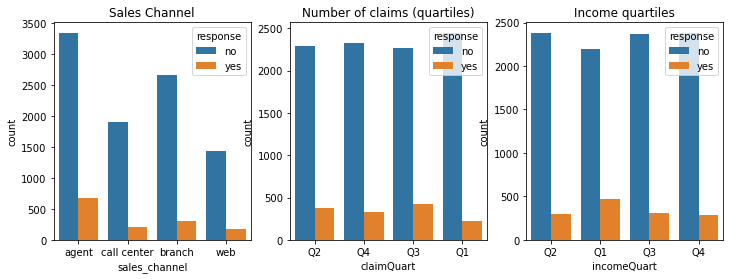

In [422]:
fig2, ax2 = plt.subplots(1,3, figsize=(12,4))
fig.suptitle("RESPONSE PER GROUPS", fontsize=16)

sns.countplot(x='sales_channel', hue='response', data=df_cat, order=None, hue_order=None,
                  orient=None, color=None, dodge=True, ax=ax2[0])
ax2[0].set_title('Sales Channel')

sns.countplot(x='claimQuart', hue='response', data=df, order=None, hue_order=None,
                  orient=None, color=None, dodge=True, ax=ax2[1])
ax2[1].set_title('Number of claims (quartiles)')

sns.countplot(x='incomeQuart', hue='response', data=df, order=None, hue_order=None,
                  orient=None, color=None, dodge=True, ax=ax2[2])
ax2[2].set_title('Income quartiles')

fig.subplots_adjust(hspace=4.5)

## (Optional) Don't limit your creativity! plot any interesting findings/insights that describe some interesting facts about your data set and its variables.

In [423]:
explanVars = df[['total_claim_amount', 'region', 'education', 'employment_status', 'gender',\
                'location_code', 'policy_type', 'vehicle_class', 'coverage', 'number_of_policies', 'number_of_open_complaints']]

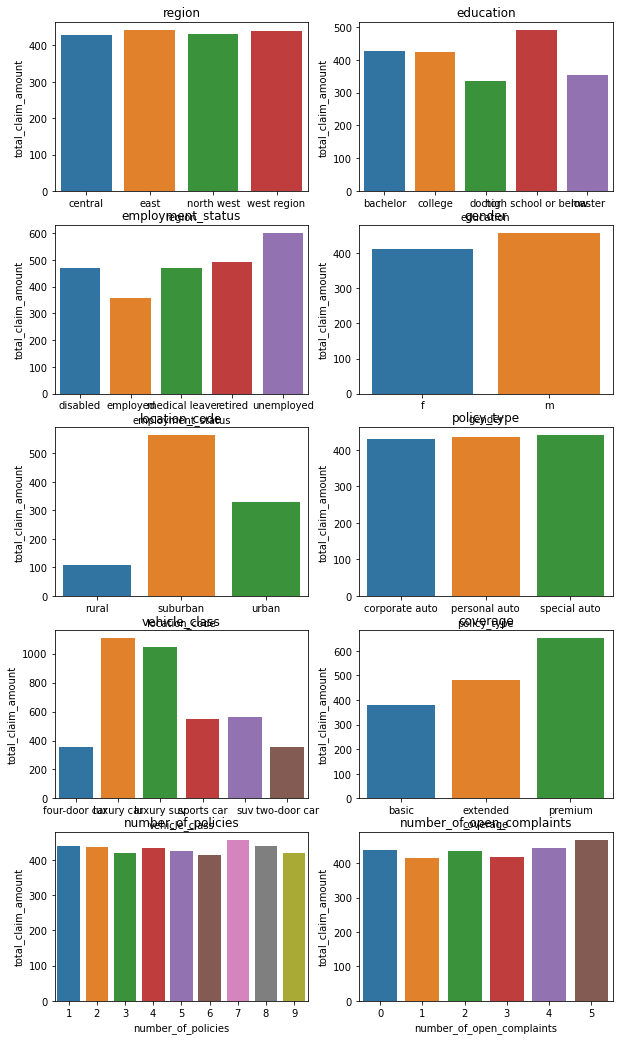

In [424]:
fig5, ax5 = plt.subplots(6,2, figsize = (10,18))
for i in range(1,11):
    x1 = explanVars.groupby(explanVars.columns[i]).mean(['total_claim_amount'])
    plt.subplot(5,2,i)
    sns.barplot(x=x1.index, y='total_claim_amount', data=x1)
    plt.title(f'{explanVars.columns[i]}')
    fig.subplots_adjust(hspace=3)

In [425]:
#%% plot them singularly
col1 = explanVars.groupby(explanVars['employment_status']).mean(['total_claim_amount'])
col1 = col1.loc[['employed', 'unemployed']]
col2 = explanVars.groupby(explanVars['location_code']).mean(['total_claim_amount'])
col3 = explanVars.groupby(explanVars['coverage']).mean(['total_claim_amount'])
col4 = explanVars.groupby(explanVars['vehicle_class']).mean(['total_claim_amount'])
col2

,total_claim_amount,number_of_policies,number_of_open_complaints
location_code,,,
rural,110.033557,2.993289,0.390700
suburban,563.492584,2.961584,0.388015
urban,329.316497,3.036539,0.382053


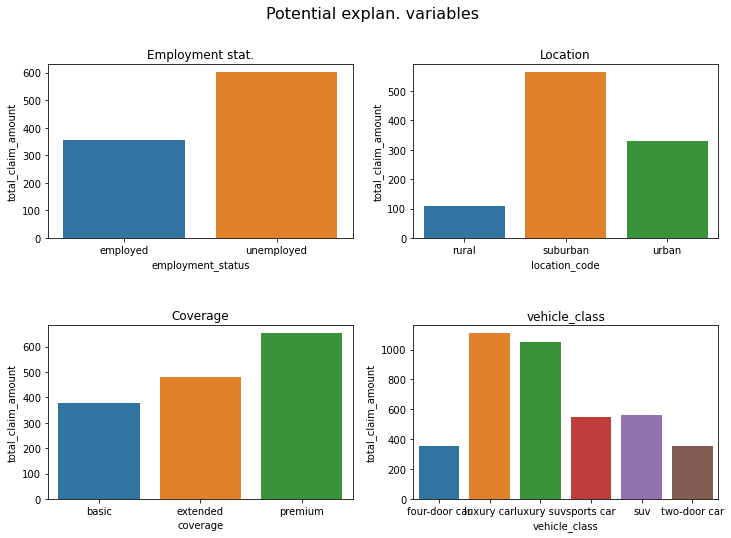

In [426]:
fig, ax = plt.subplots(2,2,figsize = (12,8))
fig.suptitle("Potential explan. variables", fontsize=16)

sns.barplot(x=col1.index, y='total_claim_amount', data=col1, ax=ax[0,0])
ax[0,0].set_title('Employment stat.')
sns.barplot(x=col2.index, y='total_claim_amount', data=col2, ax=ax[0,1])
ax[0,1].set_title('Location')
sns.barplot(x=col3.index, y='total_claim_amount', data=col3, ax=ax[1,0])
ax[1,0].set_title('Coverage')
sns.barplot(x=col4.index, y='total_claim_amount', data=col4, ax=ax[1,1])
ax[1,1].set_title('vehicle_class')
fig.subplots_adjust(hspace=.5)

#### UNEMPLOYMENT and SUBURNAN AREA seem to predict higher claims rates 
check if the frequency are high enough to be relevant

In [427]:
print("LOCATION\n", df['location_code'].value_counts(), "\n"*2, "EMPLOYMENT STAT.\n", df['employment_status'].value_counts(), "\n") 
print("COVERAGE\n ", df['coverage'].value_counts(), "\n"*2, "VEHICLE CLASS\n",  df['vehicle_class'].value_counts()) 

LOCATION
 suburban    6742
rural       2086
urban       1861
Name: location_code, dtype: int64 

 EMPLOYMENT STAT.
 employed         6658
unemployed       2751
medical leave     490
disabled          489
retired           301
Name: employment_status, dtype: int64 

COVERAGE
  basic       6523
extended    3206
premium      960
Name: coverage, dtype: int64 

 VEHICLE CLASS
 four-door car    5416
two-door car     2193
suv              2109
sports car        564
luxury suv        214
luxury car        193
Name: vehicle_class, dtype: int64


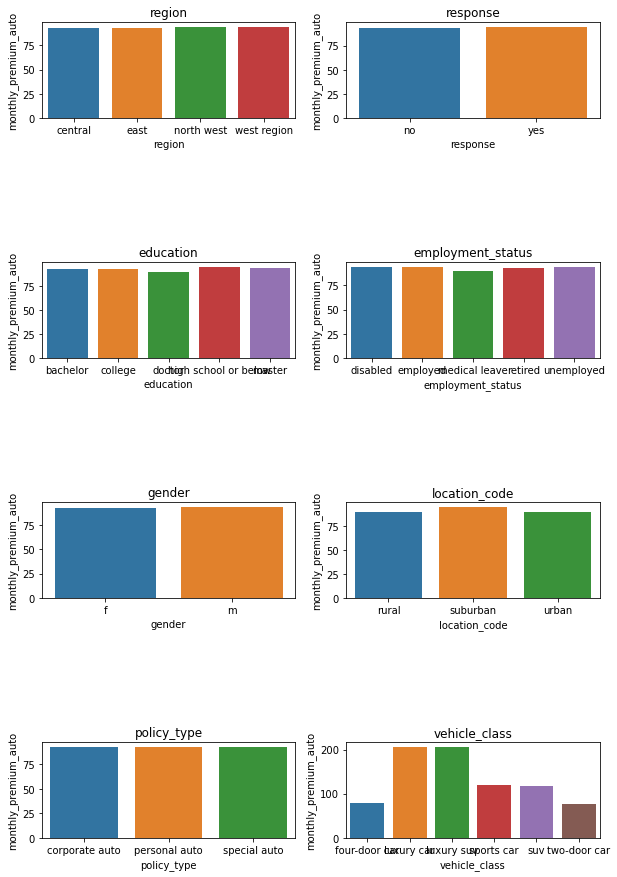

In [428]:
## We checked for monthly_premium_auto, since it was correlated with the target variable (p = .6)
explanVars2 = df[['monthly_premium_auto', 'region', 'response', 'education', 'employment_status', 'gender', \
                 'location_code', 'policy_type', 'vehicle_class']]

fig, ax = plt.subplots(4,2, figsize = (10,15))
for i in range(1, len(explanVars2.columns) ):
    x1 = explanVars2.groupby(explanVars2.columns[i]).mean(['monthly_premium_auto'])
    plt.subplot(4,2,i)
    sns.barplot(x=x1.index, y='monthly_premium_auto', data=x1)
    plt.title(f'{explanVars2.columns[i]}')
    fig.subplots_adjust(hspace=1.5)

In [429]:
#%%
'''
import plotly.express as px
import plotly.offline as py
import plotly.io as pio
pio.renderers.default = "browser"
fig = px.scatter(x=df['total_claim_amount'], y=df['monthly_premium_auto'])
fig.show()

#%%
import plotly.express as px
fig = px.scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16])
fig


#%%
import plotly.express as px
import plotly.offline as py
import plotly.io as pio
pio.renderers.default = "plotly_mimetype"
fig = px.scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16])
fig

#%%

df = px.data.gapminder().query("country=='Canada'")
fig = px.line(df, x="year", y="lifeExp", title='Life expectancy in Canada')
fig.show()'''
